In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import seaborn as sb
import numpy as np

DATA LOADING

In [2]:
file_path_client= r"D:\Source\Orion_innovation_internship_repos\Prosumer_Energy_Predict\Prosumer-Energy-Predict\raw-data\client.csv"
client_data= pd.read_csv (file_path_client)

In [3]:
client_data.head()

product_type  county  eic_count  installed_capacity  is_business  \
0             1       0        108              952.89            0   
1             2       0         17              166.40            0   
2             3       0        688             7207.88            0   
3             0       0          5              400.00            1   
4             1       0         43             1411.00            1   

         date  data_block_id  
0  2021-09-01              2  
1  2021-09-01              2  
2  2021-09-01              2  
3  2021-09-01              2  
4  2021-09-01              2

In [4]:
file_path_electricity_prices= r"D:\Source\Orion_innovation_internship_repos\Prosumer_Energy_Predict\Prosumer-Energy-Predict\raw-data\electricity_prices.csv"
electricity_prices= pd.read_csv (file_path_electricity_prices)

In [5]:
electricity_prices.head()

forecast_date  euros_per_mwh          origin_date  data_block_id
0  2021-09-01 00:00:00          92.51  2021-08-31 00:00:00              1
1  2021-09-01 01:00:00          88.90  2021-08-31 01:00:00              1
2  2021-09-01 02:00:00          87.35  2021-08-31 02:00:00              1
3  2021-09-01 03:00:00          86.88  2021-08-31 03:00:00              1
4  2021-09-01 04:00:00          88.43  2021-08-31 04:00:00              1

In [6]:
file_path_forecast_weather= r"D:\Source\Orion_innovation_internship_repos\Prosumer_Energy_Predict\Prosumer-Energy-Predict\raw-data\forecast_weather.csv"
forecast_weather= pd.read_csv (file_path_forecast_weather)

In [7]:
forecast_weather.head()

latitude  longitude      origin_datetime  hours_ahead  temperature  \
0      57.6       21.7  2021-09-01 02:00:00            1    15.655786   
1      57.6       22.2  2021-09-01 02:00:00            1    13.003931   
2      57.6       22.7  2021-09-01 02:00:00            1    14.206567   
3      57.6       23.2  2021-09-01 02:00:00            1    14.844507   
4      57.6       23.7  2021-09-01 02:00:00            1    15.293848   

    dewpoint  cloudcover_high  cloudcover_low  cloudcover_mid  \
0  11.553613         0.904816        0.019714        0.000000   
1  10.689844         0.886322        0.004456        0.000000   
2  11.671777         0.729034        0.005615        0.000000   
3  12.264917         0.336304        0.074341        0.000626   
4  12.458887         0.102875        0.088074        0.000015   

   cloudcover_total  10_metre_u_wind_component  10_metre_v_wind_component  \
0          0.905899                  -0.411328                  -9.106137   
1          0.886658                   0.206347                  -5.355405   
2          0.730499                   1.451587                  -7.417905   
3          0.385468                   1.090869                  -9.163999   
4          0.176590                   1.268481                  -8.975766   

   data_block_id    forecast_datetime  direct_solar_radiation  \
0              1  2021-09-01 03:00:00                     0.0   
1              1  2021-09-01 03:00:00                     0.0   
2              1  2021-09-01 03:00:00                     0.0   
3              1  2021-09-01 03:00:00                     0.0   
4              1  2021-09-01 03:00:00                     0.0   

   surface_solar_radiation_downwards  snowfall  total_precipitation  
0                                0.0       0.0                  0.0  
1                                0.0       0.0                  0.0  
2                                0.0       0.0                  0.0  
3                                0.0       0.0                  0.0  
4                                0.0       0.0                  0.0

In [8]:
file_path_gas_prices= r"D:\Source\Orion_innovation_internship_repos\Prosumer_Energy_Predict\Prosumer-Energy-Predict\raw-data\gas_prices.csv"
gas_prices= pd.read_csv (file_path_gas_prices)

In [9]:
gas_prices.head()

forecast_date  lowest_price_per_mwh  highest_price_per_mwh origin_date  \
0    2021-09-01                 45.23                  46.32  2021-08-31   
1    2021-09-02                 45.62                  46.29  2021-09-01   
2    2021-09-03                 45.85                  46.40  2021-09-02   
3    2021-09-04                 46.30                  46.80  2021-09-03   
4    2021-09-05                 46.30                  46.58  2021-09-04   

   data_block_id  
0              1  
1              2  
2              3  
3              4  
4              5

In [10]:
file_path_historical_weather= r"D:\Source\Orion_innovation_internship_repos\Prosumer_Energy_Predict\Prosumer-Energy-Predict\raw-data\historical_weather.csv"
historical_weather= pd.read_csv (file_path_historical_weather)

In [11]:
historical_weather.head()

datetime  temperature  dewpoint  rain  snowfall  \
0  2021-09-01 00:00:00         14.2      11.6   0.0       0.0   
1  2021-09-01 00:00:00         13.9      11.5   0.0       0.0   
2  2021-09-01 00:00:00         14.0      12.5   0.0       0.0   
3  2021-09-01 00:00:00         14.6      11.5   0.0       0.0   
4  2021-09-01 00:00:00         15.7      12.9   0.0       0.0   

   surface_pressure  cloudcover_total  cloudcover_low  cloudcover_mid  \
0            1015.9                31              31               0   
1            1010.7                33              37               0   
2            1015.0                31              34               0   
3            1017.3                 0               0               0   
4            1014.0                22              25               0   

   cloudcover_high  windspeed_10m  winddirection_10m  shortwave_radiation  \
0               11       7.083333                  8                  0.0   
1                0       5.111111                359                  0.0   
2                0       6.333333                355                  0.0   
3                0       8.083333                297                358.0   
4                0       8.416667                  5                  0.0   

   direct_solar_radiation  diffuse_radiation  latitude  longitude  \
0                     0.0                0.0      57.6       21.7   
1                     0.0                0.0      57.6       22.2   
2                     0.0                0.0      57.6       22.7   
3                   277.0               81.0      57.6       23.2   
4                     0.0                0.0      57.6       23.7   

   data_block_id  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0

In [12]:
file_path_train= r"D:\Source\Orion_innovation_internship_repos\Prosumer_Energy_Predict\Prosumer-Energy-Predict\raw-data\train.csv"
train= pd.read_csv (file_path_train)

In [13]:
train.head()

county  is_business  product_type  target  is_consumption  \
0       0            0             1   0.713               0   
1       0            0             1  96.590               1   
2       0            0             2   0.000               0   
3       0            0             2  17.314               1   
4       0            0             3   2.904               0   

              datetime  data_block_id  row_id  prediction_unit_id  
0  2021-09-01 00:00:00              0       0                   0  
1  2021-09-01 00:00:00              0       1                   0  
2  2021-09-01 00:00:00              0       2                   1  
3  2021-09-01 00:00:00              0       3                   1  
4  2021-09-01 00:00:00              0       4                   2

In [14]:
file_path_weather_station_to_county_mapping= r"D:\Source\Orion_innovation_internship_repos\Prosumer_Energy_Predict\Prosumer-Energy-Predict\raw-data\weather_station_to_county_mapping.csv"
weather_station_to_county_mapping= pd.read_csv (file_path_weather_station_to_county_mapping)

In [15]:
weather_station_to_county_mapping.head()

county_name  longitude  latitude  county
0         NaN       21.7      57.6     NaN
1         NaN       21.7      57.9     NaN
2         NaN       21.7      58.2     NaN
3         NaN       21.7      58.5     NaN
4         NaN       21.7      58.8     NaN

EDA ON HISTORICAL WEATHER DATA

In [16]:
historical_weather

datetime  temperature  dewpoint  rain  snowfall  \
0        2021-09-01 00:00:00         14.2      11.6   0.0       0.0   
1        2021-09-01 00:00:00         13.9      11.5   0.0       0.0   
2        2021-09-01 00:00:00         14.0      12.5   0.0       0.0   
3        2021-09-01 00:00:00         14.6      11.5   0.0       0.0   
4        2021-09-01 00:00:00         15.7      12.9   0.0       0.0   
...                      ...          ...       ...   ...       ...   
1710797  2023-05-30 10:00:00         11.7       4.6   0.0       0.0   
1710798  2023-05-30 10:00:00         12.3       3.5   0.0       0.0   
1710799  2023-05-30 10:00:00          9.8       3.0   0.0       0.0   
1710800  2023-05-30 10:00:00         11.7       1.6   0.0       0.0   
1710801  2023-05-30 10:00:00         12.0       1.4   0.0       0.0   

         surface_pressure  cloudcover_total  cloudcover_low  cloudcover_mid  \
0                  1015.9                31              31               0   
1                  1010.7                33              37               0   
2                  1015.0                31              34               0   
3                  1017.3                 0               0               0   
4                  1014.0                22              25               0   
...                   ...               ...             ...             ...   
1710797            1018.9                40               9              54   
1710798            1019.0                46               4              70   
1710799            1019.2                41               4              62   
1710800            1019.0                44               0              73   
1710801            1016.1                38               0              63   

         cloudcover_high  windspeed_10m  winddirection_10m  \
0                     11       7.083333                  8   
1                      0       5.111111                359   
2                      0       6.333333                355   
3                      0       8.083333                297   
4                      0       8.416667                  5   
...                  ...            ...                ...   
1710797                0       1.055556                253   
1710798                0       0.805556                263   
1710799                0       1.972222                285   
1710800                0       3.500000                307   
1710801                0       3.250000                304   

         shortwave_radiation  direct_solar_radiation  diffuse_radiation  \
0                        0.0                     0.0                0.0   
1                        0.0                     0.0                0.0   
2                        0.0                     0.0                0.0   
3                      358.0                   277.0               81.0   
4                        0.0                     0.0                0.0   
...                      ...                     ...                ...   
1710797                567.0                   392.0              175.0   
1710798                581.0                   407.0              174.0   
1710799                609.0                   432.0              177.0   
1710800                658.0                   521.0              137.0   
1710801                672.0                   550.0              122.0   

         latitude  longitude  data_block_id  
0            57.6       21.7            1.0  
1            57.6       22.2            1.0  
2            57.6       22.7            1.0  
3            57.6       23.2            1.0  
4            57.6       23.7            1.0  
...           ...        ...            ...  
1710797      59.7       26.2          637.0  
1710798      59.7       26.7          637.0  
1710799      59.7       27.2          637.0  
1710800      59.7       27.7          637.0  
1710801      59.7       28.2          637.0  

[1710802 rows x 18 

In [17]:
historical_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710802 entries, 0 to 1710801
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   datetime                object 
 1   temperature             float64
 2   dewpoint                float64
 3   rain                    float64
 4   snowfall                float64
 5   surface_pressure        float64
 6   cloudcover_total        int64  
 7   cloudcover_low          int64  
 8   cloudcover_mid          int64  
 9   cloudcover_high         int64  
 10  windspeed_10m           float64
 11  winddirection_10m       int64  
 12  shortwave_radiation     float64
 13  direct_solar_radiation  float64
 14  diffuse_radiation       float64
 15  latitude                float64
 16  longitude               float64
 17  data_block_id           float64
dtypes: float64(12), int64(5), object(1)
memory usage: 234.9+ MB


In [18]:
#sample Saaremaa longitude == 22.2 latitude == 58.2 county == 10  2021-09
historical_weather_sample = historical_weather[abs(historical_weather["longitude"] - 22.1) < 0.1][abs(historical_weather["latitude"] - 58.2) < 0.1][historical_weather["datetime"]<"2021-10-01"]
historical_weather_sample

C:\Users\shubh\AppData\Local\Temp\ipykernel_12524\2789782607.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  historical_weather_sample = historical_weather[abs(historical_weather["longitude"] - 22.1) < 0.1][abs(historical_weather["latitude"] - 58.2) < 0.1][historical_weather["datetime"]<"2021-10-01"]
C:\Users\shubh\AppData\Local\Temp\ipykernel_12524\2789782607.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  historical_weather_sample = historical_weather[abs(historical_weather["longitude"] - 22.1) < 0.1][abs(historical_weather["latitude"] - 58.2) < 0.1][historical_weather["datetime"]<"2021-10-01"]


datetime  temperature  dewpoint  rain  snowfall  \
29     2021-09-01 00:00:00         13.6      10.7   0.0       0.0   
141    2021-09-01 01:00:00         13.7      10.7   0.0       0.0   
253    2021-09-01 02:00:00         13.7      10.7   0.0       0.0   
365    2021-09-01 03:00:00         13.8      11.0   0.0       0.0   
477    2021-09-01 04:00:00         14.0      11.3   0.0       0.0   
...                    ...          ...       ...   ...       ...   
80109  2021-09-30 19:00:00         10.7       7.3   0.1       0.0   
80221  2021-09-30 20:00:00         10.7       7.6   0.1       0.0   
80333  2021-09-30 21:00:00         10.8       7.8   0.0       0.0   
80445  2021-09-30 22:00:00         10.7       8.0   0.0       0.0   
80557  2021-09-30 23:00:00         10.6       8.2   0.0       0.0   

       surface_pressure  cloudcover_total  cloudcover_low  cloudcover_mid  \
29               1012.4                27              15               0   
141              1012.5                34              13               0   
253              1012.3                16               8               0   
365              1012.2                19              12              10   
477              1012.0                29              11              24   
...                 ...               ...             ...             ...   
80109            1021.2               100             100              87   
80221            1021.5               100             100              84   
80333            1021.4               100              93              79   
80445            1021.7               100              77              91   
80557            1021.5                93              50              62   

       cloudcover_high  windspeed_10m  winddirection_10m  shortwave_radiation  \
29                  46       6.805556                358                  0.0   
141                 74       6.916667                358                  0.0   
253                 29       6.416667                355                  0.0   
365                  8       6.277778                352                  0.0   
477                 16       6.111111                350                  0.0   
...                ...            ...                ...                  ...   
80109                1       7.000000                161                  0.0   
80221               53       6.861111                164                  0.0   
80333               48       6.638889                169                  0.0   
80445               46       6.361111                172                  0.0   
80557               37       5.916667                175                  0.0   

       direct_solar_radiation  diffuse_radiation  latitude  longitude  \
29                        0.0                0.0      58.2       22.2   
141                       0.0                0.0      58.2       22.2   
253                       0.0                0.0      58.2       22.2   
365                       0.0                0.0      58.2       22.2   
477                       0.0                0.0      58.2       22.2   
...                       ...                ...       ...        ...   
80109                     0.0                0.0      58.2       22.2   
80221                     0.0                0.0      58.2       22.2   
80333                     0.0                0.0      58.2       22.2   
80445                     0.0                0.0      58.2       22.2   
80557                     0.0                0.0      58.2       22.2   

       data_block_id  
29               1.0  
141              1.0  
253              1.0  
365              1.0  
477              1.0  
...              ...  
80109           31.0  
80221           31.0  
80333           31.0  
80445           31.0  
80557           31.0  

[720 rows x 18 columns]

In [19]:
import warnings
warnings.filterwarnings('ignore')

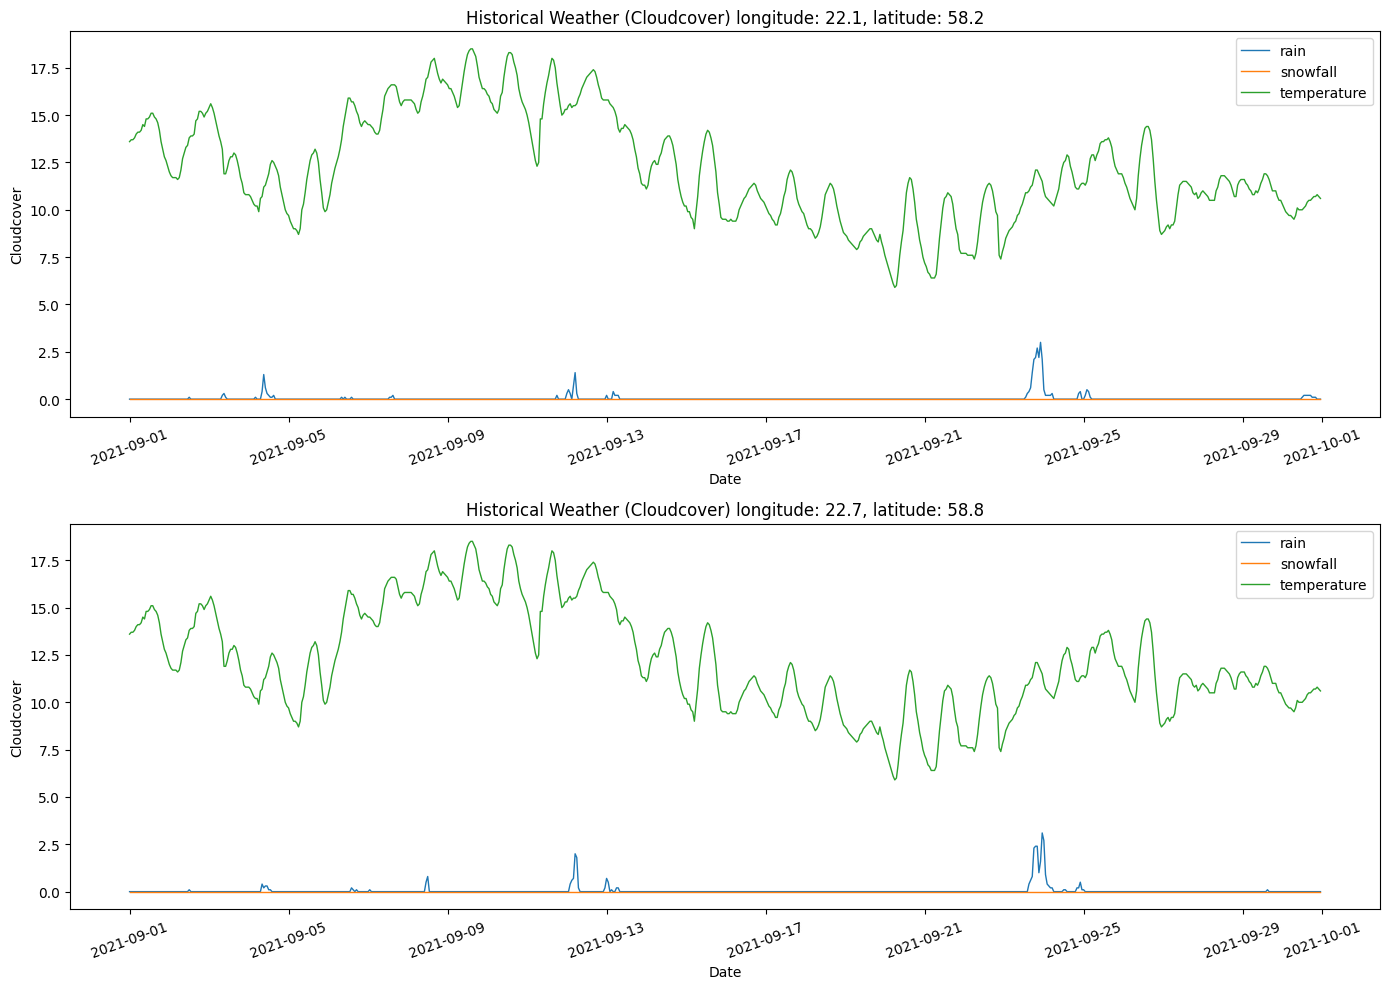

In [20]:
# Create a sample for the first plot
df_historical_weather_sample_1 = historical_weather[
    (abs(historical_weather["longitude"] - 22.1) < 0.1) &
    (abs(historical_weather["latitude"] - 58.2) < 0.1) &
    (historical_weather["datetime"] < "2021-10-01")
]
df_historical_weather_sample_1['datetime'] = pd.to_datetime(df_historical_weather_sample_1['datetime'])

# Create a sample for the second plot
df_historical_weather_sample_2 = historical_weather[
    (abs(historical_weather["longitude"] - 22.7) < 0.1) &
    (abs(historical_weather["latitude"] - 58.8) < 0.1) &
    (historical_weather["datetime"] < "2021-10-01")
]
df_historical_weather_sample_2['datetime'] = pd.to_datetime(df_historical_weather_sample_2['datetime'])

# Plotting with seaborn
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# First subplot
sb.lineplot(ax=axes[0], x='datetime', y='rain', data=df_historical_weather_sample_1, label='rain', linewidth=1)
sb.lineplot(ax=axes[0], x='datetime', y='snowfall', data=df_historical_weather_sample_1, label='snowfall', linewidth=1)
sb.lineplot(ax=axes[0], x='datetime', y='temperature', data=df_historical_weather_sample_1, label='temperature', linewidth=1)

axes[0].set_title('Historical Weather (Cloudcover) longitude: 22.1, latitude: 58.2')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cloudcover')
axes[0].tick_params(axis='x', rotation=20)
axes[0].legend()

# Second subplot
sb.lineplot(ax=axes[1], x='datetime', y='rain', data=df_historical_weather_sample_2, label='rain', linewidth=1)
sb.lineplot(ax=axes[1], x='datetime', y='snowfall', data=df_historical_weather_sample_2, label='snowfall', linewidth=1)
sb.lineplot(ax=axes[1], x='datetime', y='temperature', data=df_historical_weather_sample_1, label='temperature', linewidth=1)

axes[1].set_title('Historical Weather (Cloudcover) longitude: 22.7, latitude: 58.8')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Cloudcover')
axes[1].tick_params(axis='x', rotation=20)
axes[1].legend()

plt.tight_layout()  # Adjust the layout
plt.show()

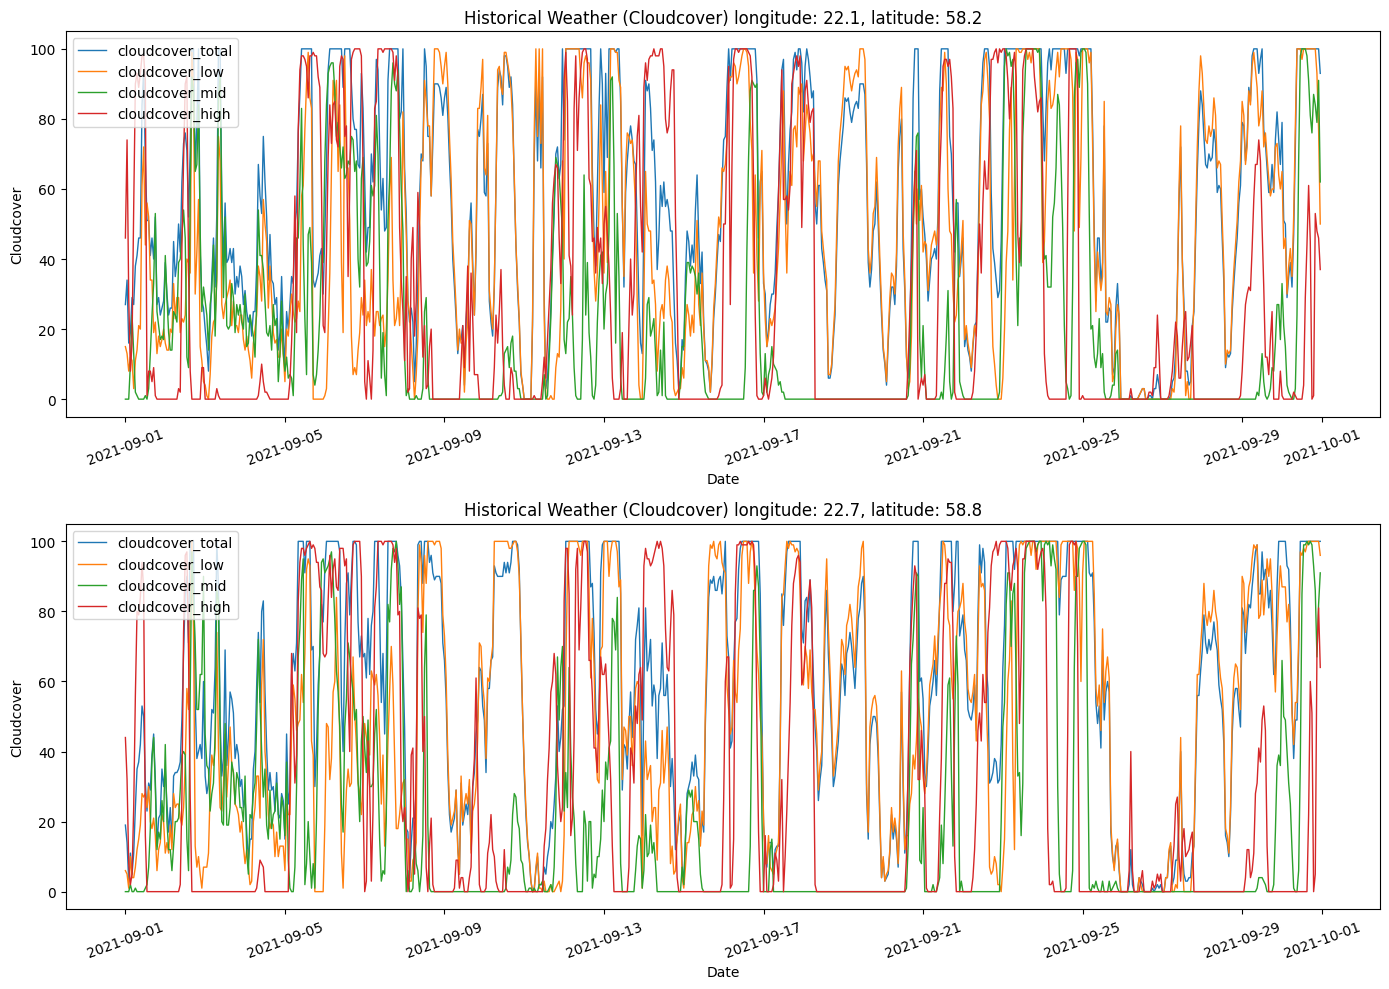

In [21]:


# Assuming 'historical_weather' is a DataFrame with your data

# Create a sample for the first plot
df_historical_weather_sample_1 = historical_weather[
    (abs(historical_weather["longitude"] - 22.1) < 0.1) &
    (abs(historical_weather["latitude"] - 58.2) < 0.1) &
    (historical_weather["datetime"] < "2021-10-01")
]
df_historical_weather_sample_1['datetime'] = pd.to_datetime(df_historical_weather_sample_1['datetime'])

# Create a sample for the second plot
df_historical_weather_sample_2 = historical_weather[
    (abs(historical_weather["longitude"] - 22.7) < 0.1) &
    (abs(historical_weather["latitude"] - 58.8) < 0.1) &
    (historical_weather["datetime"] < "2021-10-01")
]
df_historical_weather_sample_2['datetime'] = pd.to_datetime(df_historical_weather_sample_2['datetime'])

# Plotting with seaborn
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# First subplot
sb.lineplot(ax=axes[0], x='datetime', y='cloudcover_total', data=df_historical_weather_sample_1, label='cloudcover_total', linewidth=1)
sb.lineplot(ax=axes[0], x='datetime', y='cloudcover_low', data=df_historical_weather_sample_1, label='cloudcover_low', linewidth=1)
sb.lineplot(ax=axes[0], x='datetime', y='cloudcover_mid', data=df_historical_weather_sample_1, label='cloudcover_mid', linewidth=1)
sb.lineplot(ax=axes[0], x='datetime', y='cloudcover_high', data=df_historical_weather_sample_1, label='cloudcover_high', linewidth=1)
axes[0].set_title('Historical Weather (Cloudcover) longitude: 22.1, latitude: 58.2')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cloudcover')
axes[0].tick_params(axis='x', rotation=20)
axes[0].legend()

# Second subplot
sb.lineplot(ax=axes[1], x='datetime', y='cloudcover_total', data=df_historical_weather_sample_2, label='cloudcover_total', linewidth=1)
sb.lineplot(ax=axes[1], x='datetime', y='cloudcover_low', data=df_historical_weather_sample_2, label='cloudcover_low', linewidth=1)
sb.lineplot(ax=axes[1], x='datetime', y='cloudcover_mid', data=df_historical_weather_sample_2, label='cloudcover_mid', linewidth=1)
sb.lineplot(ax=axes[1], x='datetime', y='cloudcover_high', data=df_historical_weather_sample_2, label='cloudcover_high', linewidth=1)
axes[1].set_title('Historical Weather (Cloudcover) longitude: 22.7, latitude: 58.8')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Cloudcover')
axes[1].tick_params(axis='x', rotation=20)
axes[1].legend()

plt.tight_layout()  # Adjust the layout
plt.show()


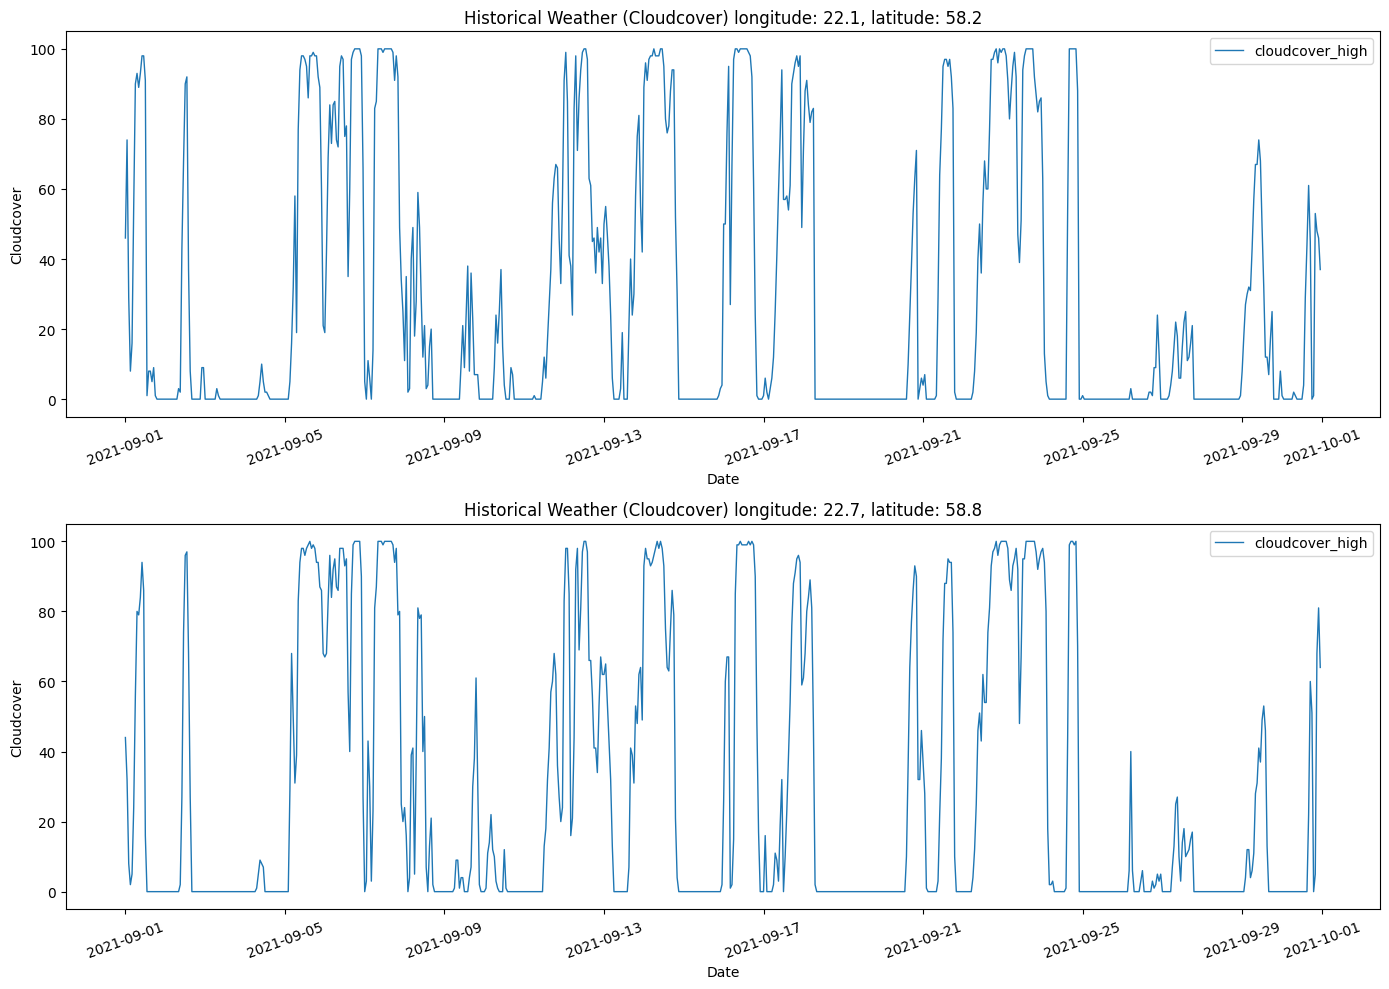

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

sb.lineplot(ax=axes[0], x='datetime', y='cloudcover_high', data=df_historical_weather_sample_1, label='cloudcover_high', linewidth=1)
axes[0].set_title('Historical Weather (Cloudcover) longitude: 22.1, latitude: 58.2')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cloudcover')
axes[0].tick_params(axis='x', rotation=20)
axes[0].legend()

sb.lineplot(ax=axes[1], x='datetime', y='cloudcover_high', data=df_historical_weather_sample_2, label='cloudcover_high', linewidth=1)
axes[1].set_title('Historical Weather (Cloudcover) longitude: 22.7, latitude: 58.8')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Cloudcover')
axes[1].tick_params(axis='x', rotation=20)
axes[1].legend()

plt.tight_layout()  # Adjust the layout
plt.show()

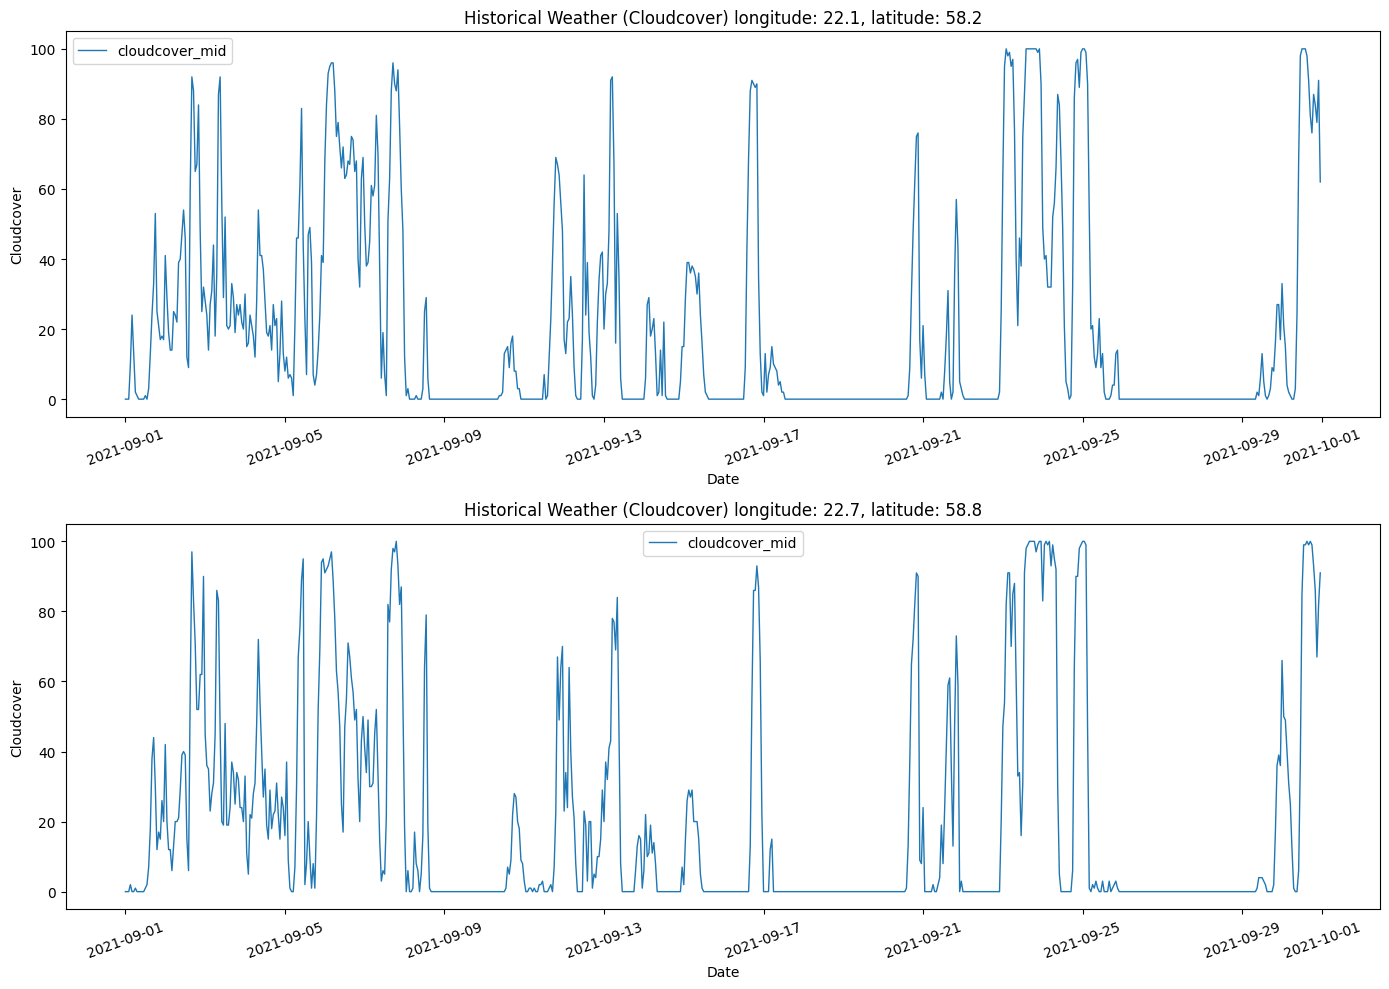

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

sb.lineplot(ax=axes[0], x='datetime', y='cloudcover_mid', data=df_historical_weather_sample_1, label='cloudcover_mid', linewidth=1)
axes[0].set_title('Historical Weather (Cloudcover) longitude: 22.1, latitude: 58.2')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cloudcover')
axes[0].tick_params(axis='x', rotation=20)
axes[0].legend()

sb.lineplot(ax=axes[1], x='datetime', y='cloudcover_mid', data=df_historical_weather_sample_2, label='cloudcover_mid', linewidth=1)
axes[1].set_title('Historical Weather (Cloudcover) longitude: 22.7, latitude: 58.8')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Cloudcover')
axes[1].tick_params(axis='x', rotation=20)
axes[1].legend()

plt.tight_layout()  # Adjust the layout
plt.show()

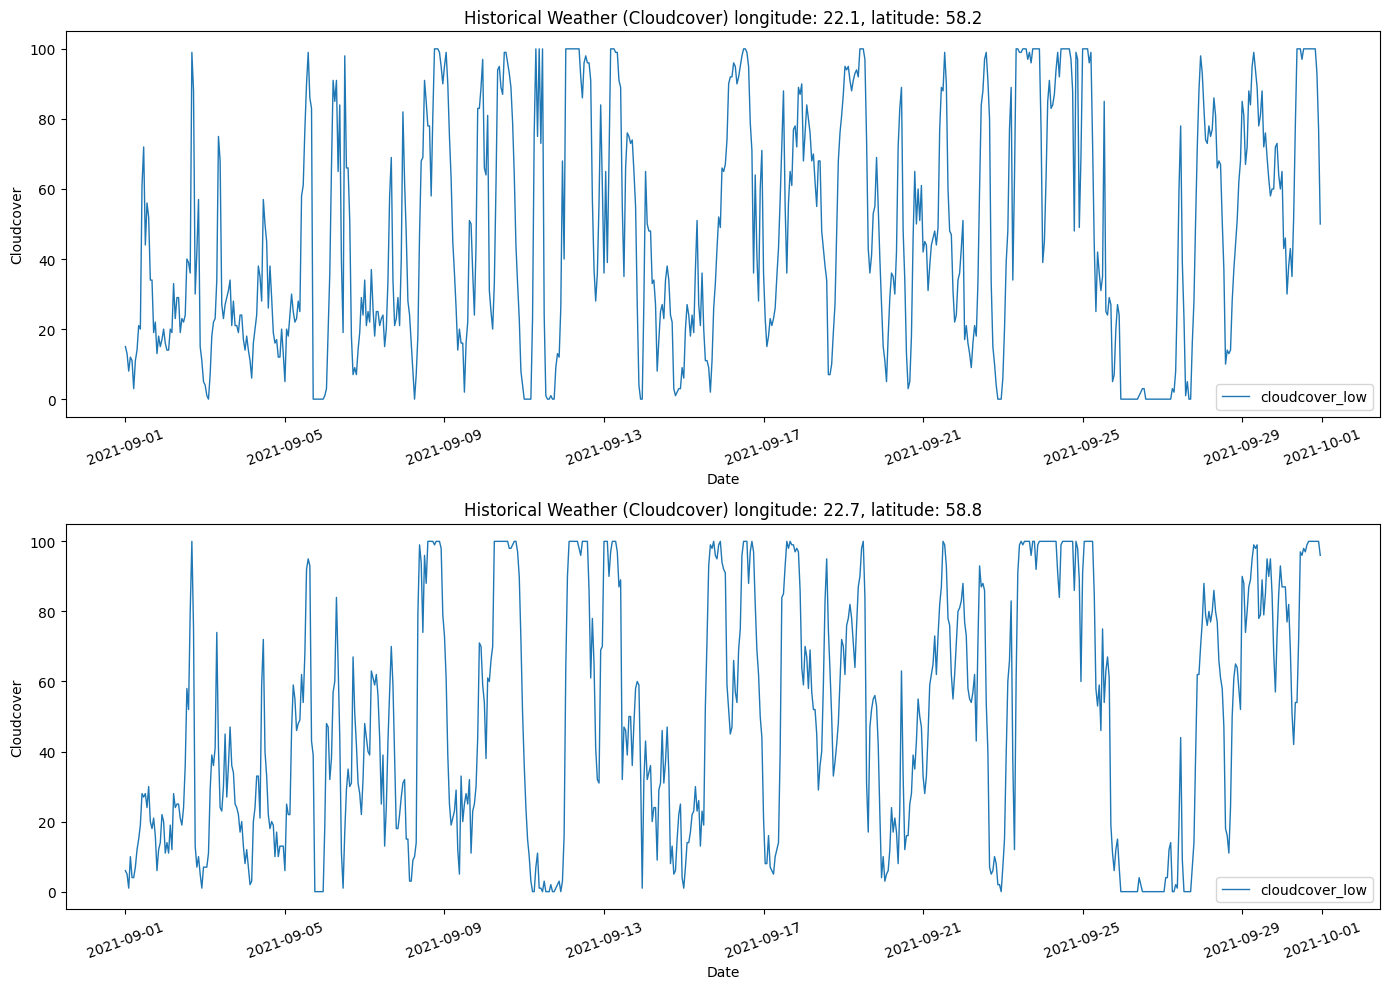

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

sb.lineplot(ax=axes[0], x='datetime', y='cloudcover_low', data=df_historical_weather_sample_1, label='cloudcover_low', linewidth=1)
axes[0].set_title('Historical Weather (Cloudcover) longitude: 22.1, latitude: 58.2')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cloudcover')
axes[0].tick_params(axis='x', rotation=20)
axes[0].legend()

sb.lineplot(ax=axes[1], x='datetime', y='cloudcover_low', data=df_historical_weather_sample_2, label='cloudcover_low', linewidth=1)
axes[1].set_title('Historical Weather (Cloudcover) longitude: 22.7, latitude: 58.8')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Cloudcover')
axes[1].tick_params(axis='x', rotation=20)
axes[1].legend()

plt.tight_layout()  # Adjust the layout
plt.show()

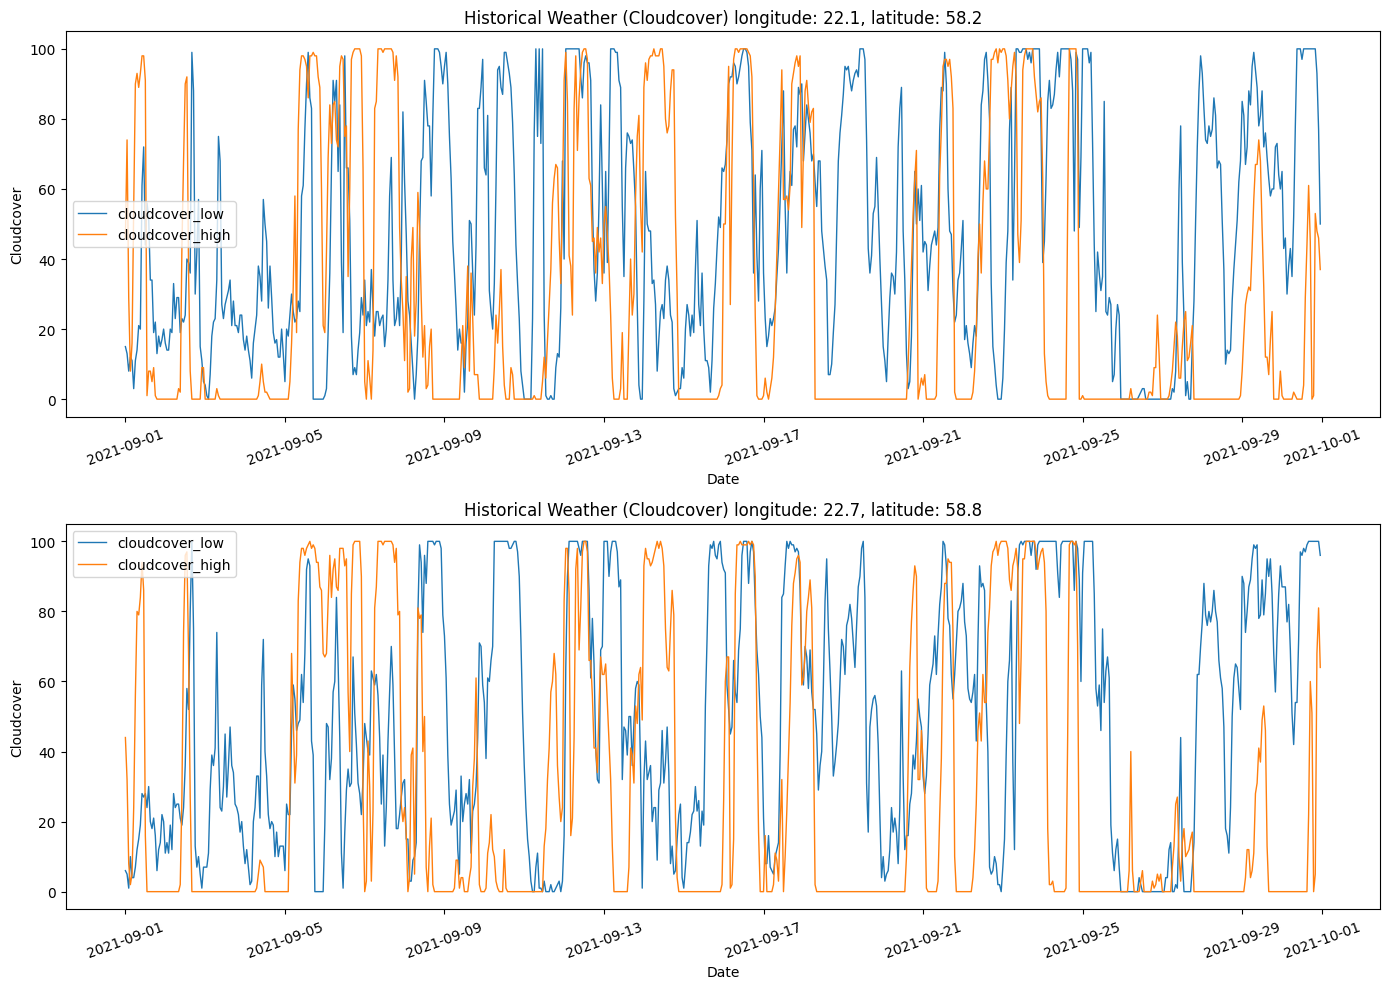

In [25]:

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# First subplot
sb.lineplot(ax=axes[0], x='datetime', y='cloudcover_low', data=df_historical_weather_sample_1, label='cloudcover_low', linewidth=1)
sb.lineplot(ax=axes[0], x='datetime', y='cloudcover_high', data=df_historical_weather_sample_1, label='cloudcover_high', linewidth=1)
axes[0].set_title('Historical Weather (Cloudcover) longitude: 22.1, latitude: 58.2')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cloudcover')
axes[0].tick_params(axis='x', rotation=20)
axes[0].legend()

# Second subplot
sb.lineplot(ax=axes[1], x='datetime', y='cloudcover_low', data=df_historical_weather_sample_2, label='cloudcover_low', linewidth=1)
sb.lineplot(ax=axes[1], x='datetime', y='cloudcover_high', data=df_historical_weather_sample_2, label='cloudcover_high', linewidth=1)
axes[1].set_title('Historical Weather (Cloudcover) longitude: 22.7, latitude: 58.8')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Cloudcover')
axes[1].tick_params(axis='x', rotation=20)
axes[1].legend()

plt.tight_layout()
plt.show()

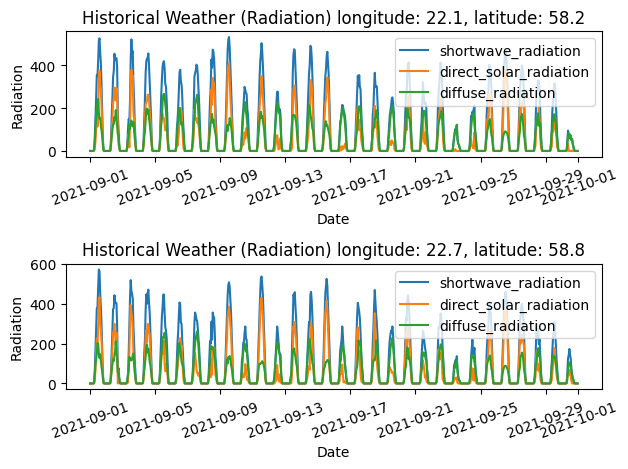

In [26]:
# shortwave_radiation direct_solar_radiation diffuse_radiation
plt.subplot(2,1,1)
df_historical_weather_sample = historical_weather[abs(historical_weather["longitude"] - 22.1) < 0.1][abs(historical_weather["latitude"] - 58.2) < 0.1][historical_weather["datetime"]<"2021-10-01"]
df_historical_weather_sample['datetime']= pd.to_datetime(df_historical_weather_sample['datetime'])
plt.plot(df_historical_weather_sample['datetime'],df_historical_weather_sample["shortwave_radiation"],label='shortwave_radiation')
plt.plot(df_historical_weather_sample['datetime'],df_historical_weather_sample["direct_solar_radiation"],label='direct_solar_radiation')
plt.plot(df_historical_weather_sample['datetime'],df_historical_weather_sample["diffuse_radiation"],label='diffuse_radiation')
plt.title('Historical Weather (Radiation) longitude: 22.1, latitude: 58.2')
plt.xlabel('Date')
plt.ylabel('Radiation')
plt.xticks(rotation=20)
plt.legend()

plt.subplot(2,1,2)
df_historical_weather_sample = historical_weather[abs(historical_weather["longitude"] - 22.7) < 0.1][abs(historical_weather["latitude"] - 58.8) < 0.1][historical_weather["datetime"]<"2021-10-01"]
df_historical_weather_sample['datetime']= pd.to_datetime(df_historical_weather_sample['datetime'])
plt.plot(df_historical_weather_sample['datetime'],df_historical_weather_sample["shortwave_radiation"],label='shortwave_radiation')
plt.plot(df_historical_weather_sample['datetime'],df_historical_weather_sample["direct_solar_radiation"],label='direct_solar_radiation')
plt.plot(df_historical_weather_sample['datetime'],df_historical_weather_sample["diffuse_radiation"],label='diffuse_radiation')
plt.title('Historical Weather (Radiation) longitude: 22.7, latitude: 58.8')
plt.xlabel('Date')
plt.ylabel('Radiation')
plt.xticks(rotation=20)
plt.legend()

plt.tight_layout()  #adjust indent
plt.show()

In [27]:
weather_station_to_county_mapping

county_name  longitude  latitude  county
0           NaN       21.7      57.6     NaN
1           NaN       21.7      57.9     NaN
2           NaN       21.7      58.2     NaN
3           NaN       21.7      58.5     NaN
4           NaN       21.7      58.8     NaN
..          ...        ...       ...     ...
107         NaN       28.2      58.5     NaN
108         NaN       28.2      58.8     NaN
109         NaN       28.2      59.1     NaN
110         NaN       28.2      59.4     NaN
111         NaN       28.2      59.7     NaN

[112 rows x 4 columns]

PLOTING COUNTY ON MAPS

In [28]:
import plotly.express as px

weather_station_to_county_mapping['size'] = 2
fig = px.scatter_mapbox(
    weather_station_to_county_mapping, 
    lat="latitude", 
    lon="longitude", 
    color="county",
    size="size",
    zoom=6,
    title='Weather Stations Locations'
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

In [29]:
# Estonian county data
counties_locations = {
    "HARJUMAA": (59.351142, 24.725384),
    "HIIUMAA": (58.918082, 22.586403),
    "IDA-VIRUMAA": (59.228971, 27.406654),
    "JÄRVAMAA": (58.897934, 25.623048),
    "JÕGEVAMAA": (58.727941, 26.413961),
    "LÄÄNE-VIRUMAA": (59.267897, 26.363968),
    "LÄÄNEMAA": (58.975935, 23.772451),
    "PÄRNUMAA": (58.448793, 24.526469),
    "PÕLVAMAA": (58.089925, 27.101149),
    "RAPLAMAA": (58.924451, 24.619842),
    "SAAREMAA": (58.414075, 22.525137),
    "TARTUMAA": (58.394168, 26.747568),
    "VALGAMAA": (57.933466, 26.191360),
    "VILJANDIMAA": (58.316916, 25.595130),
    "VÕRUMAA": (57.765485, 27.025669)
}

In [30]:
cols_loc = ["latitude", "longitude"]
weather_locations = weather_station_to_county_mapping.groupby(cols_loc).size().reset_index()[cols_loc]
display(weather_locations)

latitude  longitude
0        57.6       21.7
1        57.6       22.2
2        57.6       22.7
3        57.6       23.2
4        57.6       23.7
..        ...        ...
107      59.7       26.2
108      59.7       26.7
109      59.7       27.2
110      59.7       27.7
111      59.7       28.2

[112 rows x 2 columns]

In [31]:
counties_locations = {
    "HARJUMAA": (59.351142, 24.725384),
    "HIIUMAA": (58.918082, 22.586403),
    "IDA-VIRUMAA": (59.228971, 27.406654),
    "JÄRVAMAA": (58.897934, 25.623048),
    "JÕGEVAMAA": (58.727941, 26.413961),
    "LÄÄNE-VIRUMAA": (59.267897, 26.363968),
    "LÄÄNEMAA": (58.975935, 23.772451),
    "PÄRNUMAA": (58.448793, 24.526469),
    "PÕLVAMAA": (58.089925, 27.101149),
    "RAPLAMAA": (58.924451, 24.619842),
    "SAAREMAA": (58.414075, 22.525137),
    "TARTUMAA": (58.394168, 26.747568),
    "VALGAMAA": (57.933466, 26.191360),
    "VILJANDIMAA": (58.316916, 25.595130),
    "VÕRUMAA": (57.765485, 27.025669)
}

In [32]:
import folium
import pandas as pd

# Provided DataFrame
data = {
    'latitude': [59.351142, 58.918082, 59.228971, 58.897934, 58.727941, 59.267897, 58.975935, 58.448793, 58.089925, 58.924451, 58.414075, 58.394168, 57.933466, 58.316916, 57.765485],
    'longitude': [24.725384, 22.586403, 27.406654, 25.623048, 26.413961, 26.363968, 23.772451, 24.526469, 27.101149, 24.619842, 22.525137, 26.747568, 26.191360, 25.595130, 27.025669],
    'county': ["HARJUMAA","HIIUMAA", "IDA-VIRUMAA", "JÄRVAMAA", "JÕGEVAMAA", "LÄÄNE-VIRUMAA", "LÄÄNEMAA", "PÄRNUMAA", "PÕLVAMAA", "RAPLAMAA", "SAAREMAA", "TARTUMAA", "VALGAMAA", "VILJANDIMAA", "VÕRUMAA"]
}

weather_station_to_county_mapping = pd.DataFrame(data)

# Initialize the map centered around an average location
m = folium.Map(location=[weather_station_to_county_mapping['latitude'].mean(), 
                         weather_station_to_county_mapping['longitude'].mean()], zoom_start=6)

# Add points to the map
for _, row in weather_station_to_county_mapping.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,  # This represents the 'size' from your Plotly example
        popup=row['county'],
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# Add title (Note: Folium doesn't support titles natively, you may need to add HTML)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Weather Stations Locations</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

# Save the map as an HTML file or display it in a Jupyter notebook
m.save('weather_stations_map.html')

# To display in Jupyter Notebook (uncomment the next line if using Jupyter)
display(m)


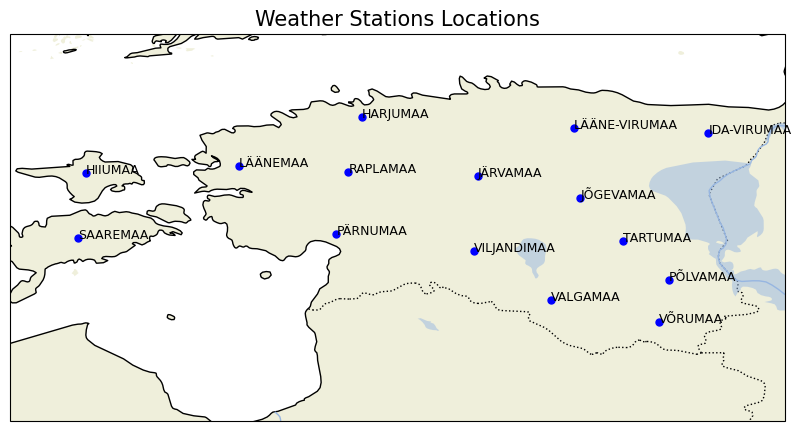

In [33]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd

# Provided DataFrame
data = {
    'latitude': [59.351142, 58.918082, 59.228971, 58.897934, 58.727941, 59.267897, 58.975935, 58.448793, 58.089925, 58.924451, 58.414075, 58.394168, 57.933466, 58.316916, 57.765485],
    'longitude': [24.725384, 22.586403, 27.406654, 25.623048, 26.413961, 26.363968, 23.772451, 24.526469, 27.101149, 24.619842, 22.525137, 26.747568, 26.191360, 25.595130, 27.025669],
    'county': ["HARJUMAA","HIIUMAA", "IDA-VIRUMAA", "JÄRVAMAA", "JÕGEVAMAA", "LÄÄNE-VIRUMAA", "LÄÄNEMAA", "PÄRNUMAA", "PÕLVAMAA", "RAPLAMAA", "SAAREMAA", "TARTUMAA", "VALGAMAA", "VILJANDIMAA", "VÕRUMAA"]
}

weather_station_to_county_mapping = pd.DataFrame(data)

# Initialize the map
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([22, 28, 57, 60], crs=ccrs.PlateCarree())  # Set the extent to match the data

# Add geographic features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Add points to the map
for _, row in weather_station_to_county_mapping.iterrows():
    plt.plot(row['longitude'], row['latitude'], marker='o', color='blue', markersize=5, transform=ccrs.PlateCarree())
    plt.text(row['longitude'], row['latitude'], row['county'], transform=ccrs.PlateCarree(), fontsize=9)

# Add title
plt.title('Weather Stations Locations', fontsize=15)

# Save the map as an image file or display it
plt.savefig('weather_stations_map.png')
plt.show()


In [34]:
map_center = [df_historical_weather_sample_1['latitude'].mean(), df_historical_weather_sample_1['longitude'].mean()]
weather_map = folium.Map(location=map_center, zoom_start=5)

# Add circle markers to the map
for idx, row in df_historical_weather_sample_1.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['rain'] / 10,  # Adjust radius as needed
        popup=f"Rain: {row['rain']} mm",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(weather_map)

display(weather_map)

In [35]:
map_center = [df_historical_weather_sample_2['latitude'].mean(), df_historical_weather_sample_2['longitude'].mean()]
weather_map = folium.Map(location=map_center, zoom_start=5)

# Add circle markers to the map
for idx, row in df_historical_weather_sample_2.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['rain'] / 10,  # Adjust radius as needed
        popup=f"Rain: {row['rain']} mm",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(weather_map)

display(weather_map)

In [36]:
print("Historical Weather Data:")
print(historical_weather.head())
print("\nTrain Data:")
print(train.head())

# Assuming 'date' is the common column
merged_data = pd.merge(train, historical_weather, on='datetime', how='inner')

# Display the first few rows of the merged dataset
print("\nMerged Data:")
print(merged_data.head())

Historical Weather Data:
              datetime  temperature  dewpoint  rain  snowfall  \
0  2021-09-01 00:00:00         14.2      11.6   0.0       0.0   
1  2021-09-01 00:00:00         13.9      11.5   0.0       0.0   
2  2021-09-01 00:00:00         14.0      12.5   0.0       0.0   
3  2021-09-01 00:00:00         14.6      11.5   0.0       0.0   
4  2021-09-01 00:00:00         15.7      12.9   0.0       0.0   

   surface_pressure  cloudcover_total  cloudcover_low  cloudcover_mid  \
0            1015.9                31              31               0   
1            1010.7                33              37               0   
2            1015.0                31              34               0   
3            1017.3                 0               0               0   
4            1014.0                22              25               0   

   cloudcover_high  windspeed_10m  winddirection_10m  shortwave_radiation  \
0               11       7.083333                  8                